 # project: 고양이 수염 스티커 만들기

## library import

In [50]:
import cv2 # opencv
import matplotlib.pyplot as plt
import numpy as np

import dlib # face landmark localization

import os

## img data import

In [51]:
#img path
img_path= "./imgs/s3.jpg"
mushtache_path= "./imgs/05-cat_m.png"

#img read
img_origin_target = cv2.imread(img_path)
img_origin_mushtache = cv2.imread(mushtache_path)

img_show = img_origin_target.copy() # 출력용 이미지 복사

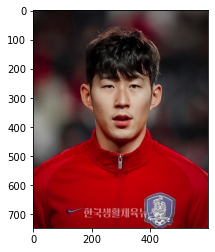

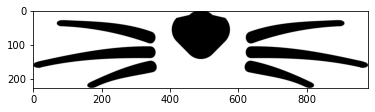

In [52]:
# 이미지 출력
img_rgb = cv2.cvtColor(img_origin_target, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

img_rgb = cv2.cvtColor(img_origin_mushtache, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


## 얼굴 찾기 face detection

In [53]:
# detector 선언
Detector_HOG = dlib.get_frontal_face_detector()


In [54]:
# bounding box 추출

img_rgb = cv2.cvtColor(img_origin_target, cv2.COLOR_BGR2RGB) # rgb 이미지 

face_rect = Detector_HOG(img_rgb, 1) # 이미지 파라미터

print(face_rect)

rectangles[[(191, 192) (414, 415)]]


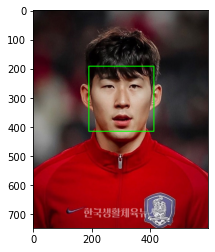

In [55]:
# 

for dlib_rect in face_rect:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 점 찍기 face landmark localization

In [56]:
# object kepoin estimation import
# model import

model_path = './data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


In [57]:
# point 생성.
points = landmark_predictor(img_rgb, face_rect[0])
print("points", points)


# 포인트 색출
list_point = []
list_points = list(map(lambda p: (p.x, p.y), points.parts())) # x,y 좌표 셋트로
list_point.append(list_points)

print("\n-포인트 좌표들-")
print(list_point)
print("\n")
print(len(list_point[0]))


points <_dlib_pybind11.full_object_detection object at 0x7ffb4b461bf0>

-포인트 좌표들-
[[(196, 268), (199, 296), (204, 324), (209, 351), (217, 378), (233, 404), (252, 426), (276, 443), (304, 447), (333, 443), (356, 427), (375, 406), (391, 383), (400, 356), (403, 328), (406, 299), (408, 272), (223, 239), (235, 223), (254, 216), (274, 217), (291, 225), (314, 225), (334, 220), (353, 219), (372, 225), (383, 241), (305, 257), (305, 276), (306, 296), (306, 316), (286, 333), (296, 336), (307, 339), (316, 335), (326, 332), (243, 263), (253, 258), (266, 258), (276, 266), (265, 268), (253, 268), (331, 265), (341, 258), (353, 258), (364, 264), (354, 268), (342, 268), (271, 375), (283, 365), (297, 357), (306, 361), (315, 358), (327, 365), (337, 375), (327, 391), (315, 399), (305, 400), (294, 398), (281, 390), (278, 375), (296, 372), (306, 373), (315, 372), (330, 375), (315, 378), (305, 380), (296, 379)]]


68


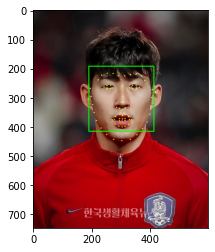

In [58]:
# 사진에 point 까지 찍기
#사진에 점찍기....


for idx, point in enumerate(list_points):
    cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용 위치 
- [hint] 2, 36, 48, 30 번 인덱스를 이용
![](./imgs/03-dll.png)

In [59]:
## 33 51
print("dlib_rects", face_rect)
print("list_landmarks", list_points)

print()

print(list_points[33], list_points[51]) #  코랑 입술 사이
x = int(np.mean((list_points[33][0],list_points[51][0])))
y = int(np.mean((list_points[33][1],list_points[51][1])))
x, y

dlib_rects rectangles[[(191, 192) (414, 415)]]
list_landmarks [(196, 268), (199, 296), (204, 324), (209, 351), (217, 378), (233, 404), (252, 426), (276, 443), (304, 447), (333, 443), (356, 427), (375, 406), (391, 383), (400, 356), (403, 328), (406, 299), (408, 272), (223, 239), (235, 223), (254, 216), (274, 217), (291, 225), (314, 225), (334, 220), (353, 219), (372, 225), (383, 241), (305, 257), (305, 276), (306, 296), (306, 316), (286, 333), (296, 336), (307, 339), (316, 335), (326, 332), (243, 263), (253, 258), (266, 258), (276, 266), (265, 268), (253, 268), (331, 265), (341, 258), (353, 258), (364, 264), (354, 268), (342, 268), (271, 375), (283, 365), (297, 357), (306, 361), (315, 358), (327, 365), (337, 375), (327, 391), (315, 399), (305, 400), (294, 398), (281, 390), (278, 375), (296, 372), (306, 373), (315, 372), (330, 375), (315, 378), (305, 380), (296, 379)]

(307, 339) (306, 361)


(306, 350)

In [60]:
## 콧수염 리사이즈
# 입슬과 코사이 33, 51 유클리드 거리로  => hight 
# 입술 48, 54 width 유클리드 거리로=> width

def euclidean_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += (pt1[i] - pt2[i]) ** 2
  return distance ** 0.5

w = int(euclidean_distance(list_points[33], list_points[51]))
h = int(euclidean_distance(list_points[48], list_points[54]))

print(w, h)

print("원래크기: ",img_origin_mushtache.shape)

img_resize_mushtache = cv2.resize(img_origin_mushtache, (w,h))

print("resize: ",img_resize_mushtache.shape)


22 66
원래크기:  (226, 981, 3)
resize:  (66, 22, 3)


In [81]:
# 스티커 위치. 조정 시작점.
refined_x = x - w // 2  # left
refined_y = y - h //2      # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (295,317)


## 스티커 붙이기

In [82]:
img_resize_mushtache.shape

(66, 22, 3)

In [90]:

print("img_resize_mushtache.shape: ", img_resize_mushtache.shape)
print("refined_y: ", refined_y)
print("img_resize_mushtache.shape[0]: ", img_resize_mushtache.shape[0])
print("refined_x: ", refined_x)
print("img_resize_mushtache.shape[1]: ", img_resize_mushtache.shape[1])
print("\n")

print(img_show.shape)
print(refined_y,img_resize_mushtache.shape[0], refined_x,refined_x+img_resize_mushtache.shape[1])
mushtache_area = img_show[refined_y:img_resize_mushtache.shape[0], refined_x:refined_x+img_resize_mushtache.shape[1]]

print("mushtache_area", mushtache_area)
img_show[0:0, 1:2]

img_resize_mushtache.shape:  (66, 22, 3)
refined_y:  317
img_resize_mushtache.shape[0]:  66
refined_x:  295
img_resize_mushtache.shape[1]:  22


(747, 600, 3)
317 66 295 317
mushtache_area []


array([], shape=(0, 1, 3), dtype=uint8)

In [66]:
img_show[refined_y:img_resize_mushtache.shape[0], 
         refined_x:refined_x+img_resize_mushtache.shape[1]] = \
            np.where(img_resize_mushtache==0,mushtache_area,img_resize_mushtache).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show_rgb, cv2.COLOR_BGR2RGB)) 
plt.show()

ValueError: operands could not be broadcast together with shapes (66,22,3) (0,22,3) (66,22,3) 

In [65]:

img_show[refined_y:img_resize_mushtache.shape[0], refined_x:refined_x+img_resize_mushtache.shape[1]] = \
    np.where(img_resize_mushtache==0,mushtache_area,img_resize_mushtache).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_origin_mushtache, cv2.COLOR_BGR2RGB)) 
plt.show()

NameError: name 'img_bgr' is not defined

## 문제 찾기
- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
- 실행 속도가 중요할까요?
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

# Comment